# Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import the data
df = pd.read_csv('task-1.csv')

# Preview
df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


Text(0, 0.5, 'y variable')

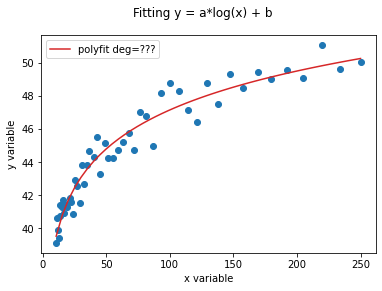

In [2]:
# Extract the x and y values
x = df.x.values
y = df.y.values

# Compute the model parameters
coefs = np.polyfit(np.log(x), y, deg=1)

# Create the x and y values for the model curve
x_values = np.linspace(min(x), max(x), len(x))
y_values = np.polyval(coefs, np.log(x_values))

# Plot the model curve
plt.scatter(x, y)
plt.plot(x_values, y_values, c='C3', label='polyfit deg=???')
plt.legend()
plt.suptitle('Fitting y = a*log(x) + b')
plt.xlabel('x variable')
plt.ylabel('y variable')

In [3]:
# Define the RSS cost function
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

# Predict the y values
y_pred = np.polyval(coefs, np.log(x))

# Compute the model and baseline RSS (mean), and the R2 score
rss_baseline = RSS(y, y.mean())
rss_model = RSS(y, y_pred)
r2_score = 1 - (rss_model/rss_baseline)

print('RSS mean :', rss_baseline)
print('RSS model :', rss_model)
print('R2 score :', r2_score)

RSS mean : 541.1432872199999
RSS model : 31.84265175275673
R2 score : 0.9411567093138287


It is a very good $R^2$ score. Being close to 1, the model performs a lot better than the mean baseline.

Before the R2 score, the 2 RSS scores already showed a clear difference, the model computing lower squared errors and thus being more accurate.

# Task 2

In [4]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

# Import the data
df2 = pd.read_csv('task-2.csv')

# Preview
print('Shape :', df2.shape)
df2.head()

Shape : (1000, 4)


,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


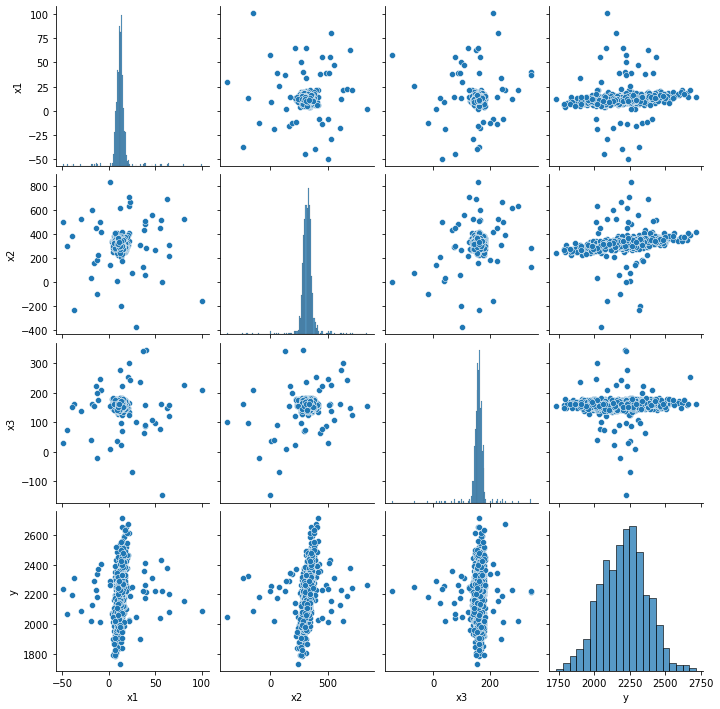

In [5]:
# Extract X and y values
X2 = df2.iloc[:, :-1].values
y2 = df2.iloc[:, -1:].values

# Split data
X_tr, X_te, y_tr, y_te = train_test_split(
    X2, y2, train_size=0.8, test_size=0.2, random_state=0)

# Plot the pairplot of the train data set.
df_tr = pd.DataFrame(np.c_[X_tr, y_tr], columns=df2.columns)
sns.pairplot(df_tr)

The features seem to be containing more outliers than the target variable. Nonetheless, both X and y train set will be filtered with their own mean and standard deviation.

In [6]:
# Compute z-scores
X_z_scores = (X_tr - X_tr.mean()) / X_tr.std()
y_z_scores = (y_tr - y_tr.mean()) / y_tr.std()

# Create filters
X_idx = (np.abs(X_z_scores) < 2)
y_idx = (np.abs(y_z_scores) < 2)

# Apply filters
filter = np.all(np.c_[X_idx, y_idx], axis=1)
X_tr_wo = X_tr[filter]
y_tr_wo = y_tr[filter]

X_tr_wo.shape, y_tr_wo.shape

((741, 3), (741, 1))

### 1. Fit a linear regression with the outliers

In [7]:
# Create a linear regression object
lr = LinearRegression()

# Fit the model
lr.fit(X_tr, y_tr)

# Compute predictions
lr_y_pred = lr.predict(X_te)

### 2. Fit a huber regression with the outliers

In [8]:
# Create a linear regression object
huber = HuberRegressor(epsilon=2)

# Fit the model
huber.fit(X_tr, y_tr.ravel())

# Compute predictions
huber_y_pred = huber.predict(X_te)

### 3. Fit a linear regression without the outliers

In [9]:
# Create a linear regression object
lr_wo = LinearRegression()

# Fit the model
lr_wo.fit(X_tr_wo, y_tr_wo)

# Compute predictions
lr_wo_y_pred = lr_wo.predict(X_te)

## Results

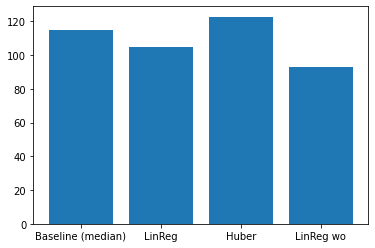

Baseline (median) : 115.003 
LinReg : 104.788 
Huber : 122.680 
LinReg wo : 92.727


In [10]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

# Compute MAE score for each regression
baseline_mae = MAE(y_te, np.median(y_te))
lr_mae = MAE(y_te, lr_y_pred)
huber_mae = MAE(y_te, huber_y_pred)
lr_wo_mae = MAE(y_te, lr_wo_y_pred)

# Bar chart
plt.bar([1, 2, 3, 4], [baseline_mae, lr_mae, huber_mae, lr_wo_mae])
plt.xticks([1, 2, 3, 4], ['Baseline (median)', 'LinReg', 'Huber', 'LinReg wo'])
plt.show()
print(
    'Baseline (median) : {:.3f}'.format(baseline_mae),
    '\nLinReg : {:.3f}'.format(lr_mae),
    '\nHuber : {:.3f}'.format(huber_mae),
    '\nLinReg wo : {:.3f}'.format(lr_wo_mae)
)